Занятие 6. Линейная регрессия
===========

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

### Золотые кольца с бриллиантами

In [16]:
df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])

In [17]:
df.head()

,weight,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


Будем предсказывать цену кольца с бриллиантом от веса бриллианта. Попробуем предсказать результат не только с помощью самой переменной, но и с помощью её степеней. Первая модель будет зависеть только от самой переменной ```weight```, вторая -- от переменной ```weight^2```, а третья -- от двух этих переменных сразу.

In [18]:
df['weight_2'] = df['weight']**2

In [19]:
df.head()

,weight,price,weight_2
0,0.17,355,0.0289
1,0.16,328,0.0256
2,0.17,350,0.0289
3,0.18,325,0.0324
4,0.25,642,0.0625


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print('R^2: {0}'.format(model.score(X, y)))

R^2: 0.9789175801893899


Выведем регрессионные коэффициенты от метода model.coef_ и свободный член от метода model.intercept_.

In [24]:
coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,-174.130082
1,weight,2920.130591
2,weight_2,1739.901579


In [25]:
from scipy import stats

def regression_coef(model, X, y):
    coef = pd.DataFrame(list(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist())),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef
regression_coef(model, X, y)

,predictor,coef,pvalue
0,intercept,-174.130082,0.021866
1,weight,2920.130591,0.000077
2,weight_2,1739.901579,0.237265


In [26]:
X1 = X.drop('weight_2', axis=1)
#  y = df['price']

In [27]:
model_2 = LinearRegression()
model_2.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print('R^2: {0}'.format(model_2.score(X1, y)))

R^2: 0.978260777986033


In [29]:
regression_coef(model_2, X1, y)

,predictor,coef,pvalue
0,intercept,-259.625907,0.0
1,weight,3721.024852,0.0


In [30]:
X2 = X.drop('weight', axis=1)
#  y = df['price']

In [31]:
model_3 = LinearRegression()
model_3.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print('R^2: {0}'.format(model_3.score(X2, y)))

regression_coef(model_2, X2, y)


R^2: 0.9703108184171091


,predictor,coef,pvalue
0,intercept,-259.625907,0.145641
1,weight_2,3721.024852,0.277026


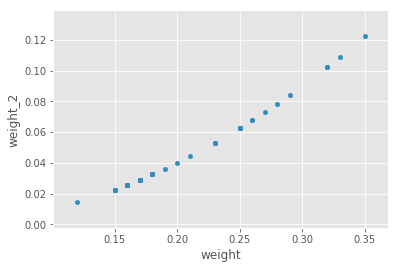

In [14]:
df.plot.scatter(x='weight', y='weight_2')